# Time Analysis of Topics

Here I am going to see, how the topics researched changed through time. Were some topics more popular on the beginning? Did some have just a very narrow bump at one point? 

## Imports

In [1]:
from constants import all_topics_names, folder_meicogsci, folder_meicogsci_2019, folder_models
from helping_functions import get_topics_for_abstract
import matplotlib.pyplot as plt
import collections
import gensim
import pandas
import nltk
import os

In [2]:
# initializing lem for lemmatization with preprocessing
lem = nltk.stem.WordNetLemmatizer()

In [3]:
# getting the list of all files with abstracts
all_files = os.listdir(folder_meicogsci)
all_files_2019 = os.listdir(folder_meicogsci_2019)

In [4]:
# importing the model
model_21 = gensim.models.LdaModel.load(os.path.join(folder_models, "LDA_21"))
model_21.minimum_probability = 0.0

In [5]:
# calculate the topics for each abstract
all_files_by_topic = []
for filename in all_files:
    all_files_by_topic.append(get_topics_for_abstract(folder_meicogsci, filename, model_21, lem))
for filename in all_files_2019:
    all_files_by_topic.append(get_topics_for_abstract(folder_meicogsci_2019, filename, model_21, lem))

In [6]:
# Here I am calculating different values for each topic and year, to later help me answer my research questions
topic_popularity = collections.defaultdict(int)
topics_by_year_all = collections.defaultdict(dict)
topics_by_year_threshold = collections.defaultdict(dict)
all_topics_in_year = collections.defaultdict(int)
for row in all_files_by_topic:
    topics = row[:-2]
    year = row[-2].split("_")[1]
    for topic, rep in enumerate(topics):
        all_topics_in_year[year] += rep
        topic_popularity[topic] += rep
        try:
            topics_by_year_all[topic][year] += rep
        except KeyError:
            topics_by_year_all[topic][year] = rep
        if rep > 0.1:
            try:
                topics_by_year_threshold[topic][year] += rep
            except KeyError:
                topics_by_year_threshold[topic][year] = rep

In [7]:
# Here I am calculating, how many abstract are published in each year
all_files_in_year = collections.defaultdict(int)
for filename in all_files:
    year = filename.split("_")[1]
    all_files_in_year[year] += 1
for filename in all_files_2019:
    year = filename.split("_")[1]
    all_files_in_year[year] += 1

On the quick glance, it seems like the abstract number increased until 2015, and then it platued.

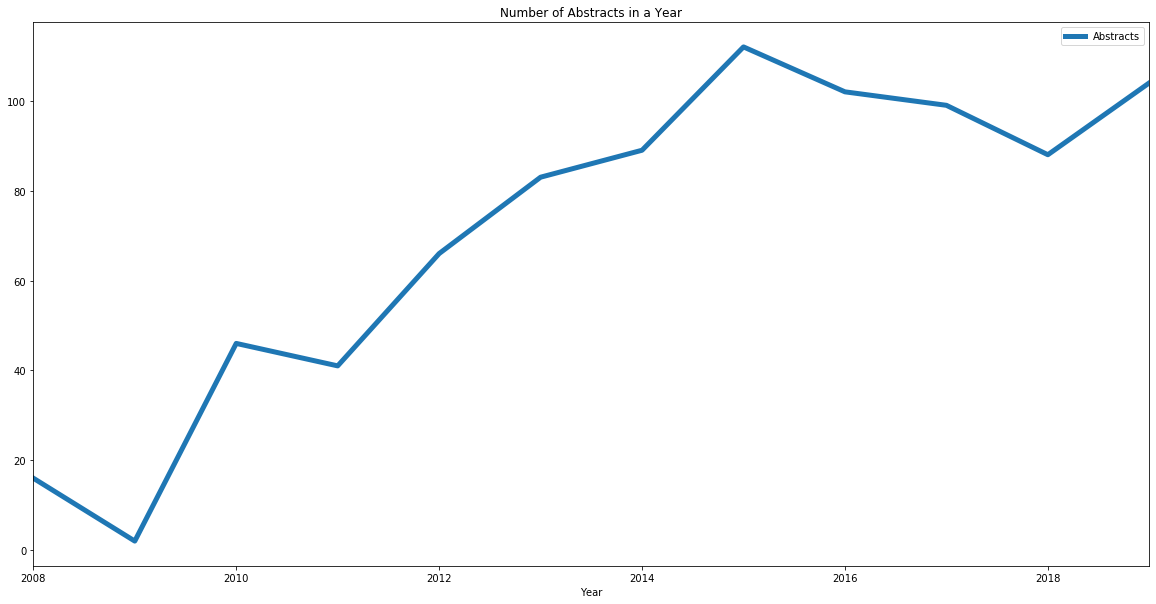

In [8]:
pandas.DataFrame([[year, count] for year, count in all_files_in_year.items()], columns=["Year", "Abstracts"]).sort_values(by="Year").plot(x="Year", y="Abstracts", figsize=(20,10), title='Number of Abstracts in a Year', linewidth=5)

Next I can calculate the populatity of each topic overall. Below are the rankings. And below there are the bar graph with all topics and their popularity. 

In [9]:
pandas.DataFrame([[all_topics_names[topic], pop] for topic, pop in topic_popularity.items()], columns=["Topic", "Popularity"]).sort_values(by="Popularity", ascending=False).set_index('Topic')/len(all_files)

,Popularity
Topic,
constructivism,0.115576
society,0.089480
learning,0.084795
decision making,0.083198
neuroscience,0.078510
language,0.069671
perception,0.063784
modeling,0.060311
movement,0.055808


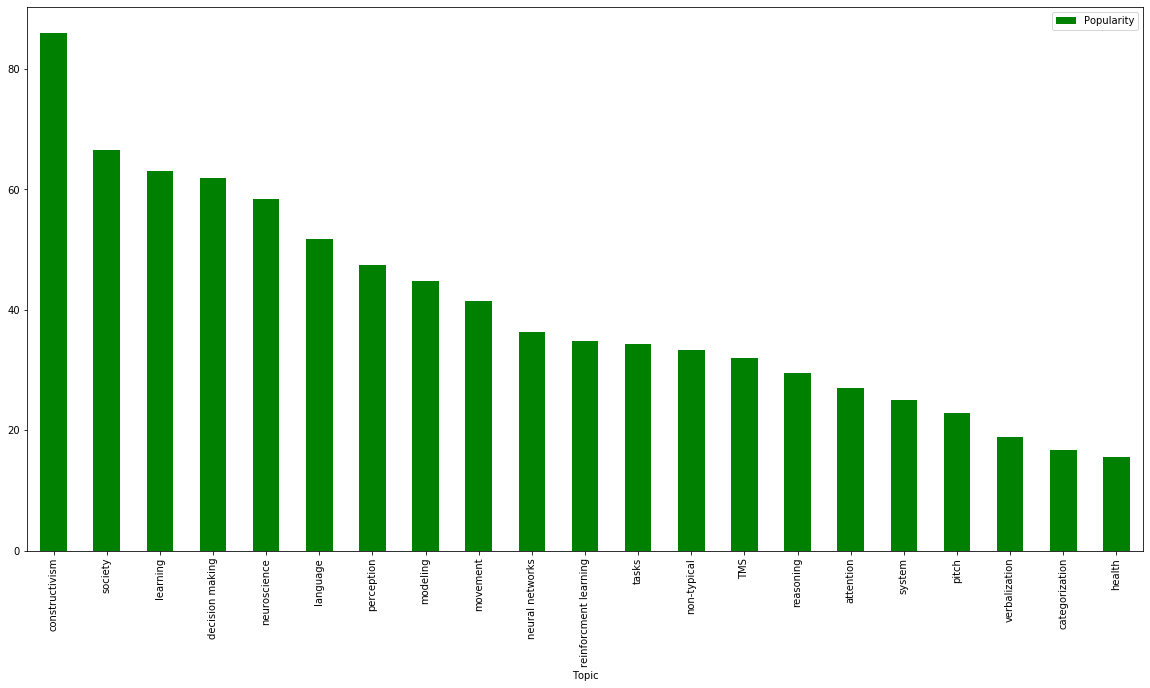

In [10]:
pandas.DataFrame([[topic, all_topics_names[topic], pop] for topic, pop in topic_popularity.items()], columns=["ID", "Topic", "Popularity"]).sort_values(by="Popularity", ascending=False).set_index('Topic')[["Popularity"]].plot(kind="bar", figsize=(20,10), color="green")

Next we can see the absolute popularity of topics through the year. Something to keep in mind here, the number of abstract was not the same from year to year. But the relative difference should still be seen. 

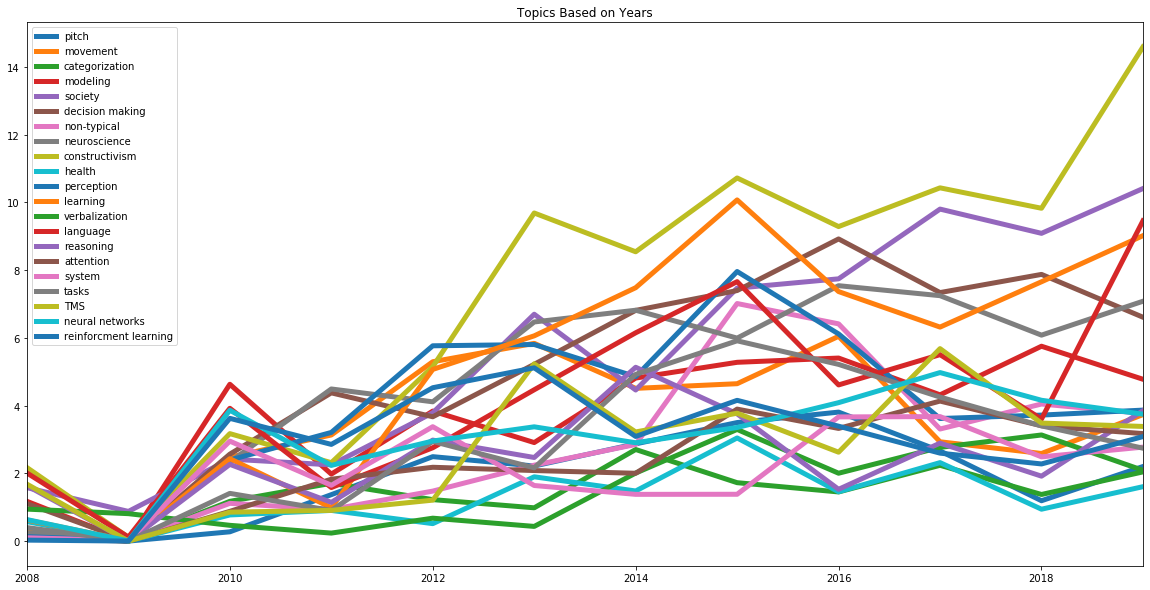

In [11]:
pandas.DataFrame(topics_by_year_all).rename(columns=all_topics_names).plot(figsize=(20,10), title='Topics Based on Years', linewidth=5)

Or if we take just five most popular topics. 

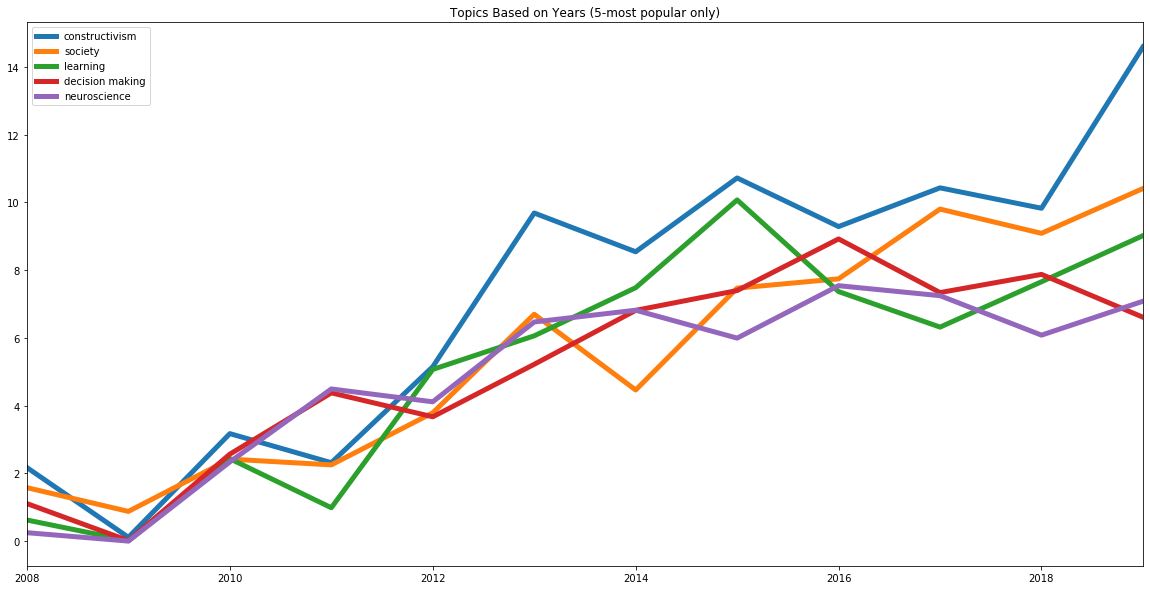

In [12]:
pandas.DataFrame(topics_by_year_all)[list(pandas.DataFrame([[topic, all_topics_names[topic], pop] for topic, pop in topic_popularity.items()], columns=["ID", "Topic", "Popularity"]).sort_values(by="Popularity", ascending=False)[:5]["ID"])].rename(columns=all_topics_names).plot(figsize=(20,10), title='Topics Based on Years (5-most popular only)', linewidth=5)

Or if we take the 8 most popular ones (because this includes all the topics, that were the most popular in the seperate years as well). 

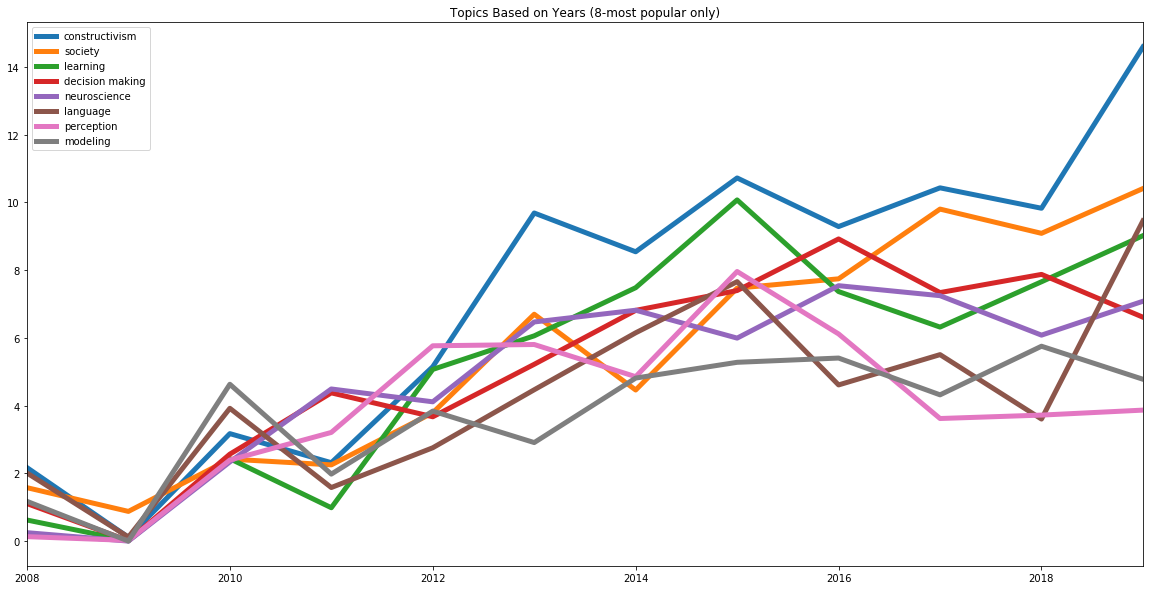

In [13]:
pandas.DataFrame(topics_by_year_all)[list(pandas.DataFrame([[topic, all_topics_names[topic], pop] for topic, pop in topic_popularity.items()], columns=["ID", "Topic", "Popularity"]).sort_values(by="Popularity", ascending=False)[:8]["ID"])].rename(columns=all_topics_names).plot(figsize=(20,10), title='Topics Based on Years (8-most popular only)', linewidth=5)

The raw data for the popularity of topics by year. 

In [14]:
pandas.DataFrame(topics_by_year_all).rename(columns=all_topics_names)

,pitch,movement,categorization,modeling,society,decision making,non-typical,neuroscience,constructivism,health,...,learning,verbalization,language,reasoning,attention,system,tasks,TMS,neural networks,reinforcment learning
2008,0.302625,0.322592,0.143970,1.174074,1.577733,1.107875,0.107558,0.248907,2.170267,0.574807,...,0.622711,0.944143,2.011020,1.633574,0.081514,0.098624,0.399715,1.681234,0.635697,0.029332
2009,0.000696,0.000696,0.000696,0.000696,0.877055,0.013486,0.006398,0.000696,0.112430,0.000696,...,0.012648,0.810289,0.119640,0.000696,0.000696,0.014614,0.000696,0.000696,0.005471,0.000696
2010,0.274594,2.479757,1.174290,4.629902,2.420270,2.567106,1.114894,2.337897,3.172728,0.772351,...,2.432713,0.466041,3.920059,2.264982,0.878326,2.950781,1.409107,0.854665,3.862473,3.624034
2011,1.371245,3.132969,1.707273,1.978408,2.250624,4.376081,0.935624,4.490909,2.314566,0.905872,...,0.985584,0.236970,1.581512,1.144632,1.827285,1.649028,0.904660,0.907612,2.235985,2.854744
2012,2.492927,5.294895,1.224851,3.837431,3.787901,3.670345,1.476366,4.112078,5.147868,0.515829,...,5.067912,0.676980,2.755731,2.981371,2.179582,3.377663,2.943577,1.209480,2.953858,4.527806
2013,2.217021,5.837867,0.983320,2.908843,6.696832,5.219108,2.241868,6.468815,9.685003,1.898151,...,6.059265,0.434033,4.467467,2.468280,2.083020,1.641429,2.163354,5.233770,3.373683,5.115503
2014,2.870935,4.509049,2.704262,4.812913,4.460665,6.811204,2.852639,6.815521,8.540745,1.479844,...,7.480395,2.008603,6.149057,5.131641,2.002463,1.380226,4.921322,3.222049,2.903272,3.089410
2015,3.499727,4.646339,1.724794,5.277871,7.467311,7.396319,7.013124,5.992184,10.719556,3.045232,...,10.071059,3.296628,7.658698,3.757244,3.896212,1.382612,5.912597,3.775333,3.353545,4.155554
2016,3.808030,6.045025,1.451403,5.403551,7.742082,8.919210,6.412754,7.539656,9.284625,1.456301,...,7.366035,2.003869,4.610260,1.529254,3.326205,3.666217,5.216432,2.624533,4.086804,3.392336
2017,2.662116,2.932065,2.237942,4.317756,9.800506,7.336467,3.308810,7.244662,10.427724,2.317059,...,6.317534,2.766788,5.504786,2.891922,4.133621,3.675669,4.252034,5.681496,4.975378,2.596770


Here is the list of most popular topic in each year. 

In [15]:
pandas.DataFrame(topics_by_year_all).rename(columns=all_topics_names).idxmax(axis=1)

2008    constructivism
2009           society
2010          modeling
2011      neuroscience
2012        perception
2013    constructivism
2014    constructivism
2015    constructivism
2016    constructivism
2017    constructivism
2018    constructivism
2019    constructivism
dtype: object

Here I am going to calculate the most 3 frequent topics in each year. Because of vizualization, I am going to ignore year 2008 and 2009.

In [16]:
most_freq_3_by_year_pandas = pandas.DataFrame(topics_by_year_all).rename(columns=all_topics_names).T

In [17]:
most_freq_3_by_year = dict()
for year in most_freq_3_by_year_pandas:
    most_freq_3_by_year[year] = most_freq_3_by_year_pandas[year].sort_values()[-3:][::-1].index.values.tolist()

In [18]:
pandas.DataFrame(most_freq_3_by_year)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,constructivism,society,modeling,neuroscience,perception,constructivism,constructivism,constructivism,constructivism,constructivism,constructivism,constructivism
1,language,verbalization,language,decision making,movement,society,learning,learning,decision making,society,society,society
2,TMS,language,neural networks,perception,constructivism,neuroscience,neuroscience,perception,society,decision making,decision making,language


In [19]:
pandas.DataFrame(most_freq_3_by_year).T

,0,1,2
2008,constructivism,language,TMS
2009,society,verbalization,language
2010,modeling,language,neural networks
2011,neuroscience,decision making,perception
2012,perception,movement,constructivism
2013,constructivism,society,neuroscience
2014,constructivism,learning,neuroscience
2015,constructivism,learning,perception
2016,constructivism,decision making,society
2017,constructivism,society,decision making


In [20]:
all_popular_topics = set()
[[all_popular_topics.add(topic) for topic in positions] for year, positions in most_freq_3_by_year.items() if year != "2008" or year != "2009"]
all_popular_topics

{'TMS',
 'constructivism',
 'decision making',
 'language',
 'learning',
 'modeling',
 'movement',
 'neural networks',
 'neuroscience',
 'perception',
 'society',
 'verbalization'}

In [21]:
position_by_year = collections.defaultdict(dict)
for year, positions in most_freq_3_by_year.items():
    for topic in all_popular_topics:
        if topic in positions:
            position_by_year[year][topic] = 3 - positions.index(topic)
        else:
            position_by_year[year][topic] = 0

So here is the vizualization. 

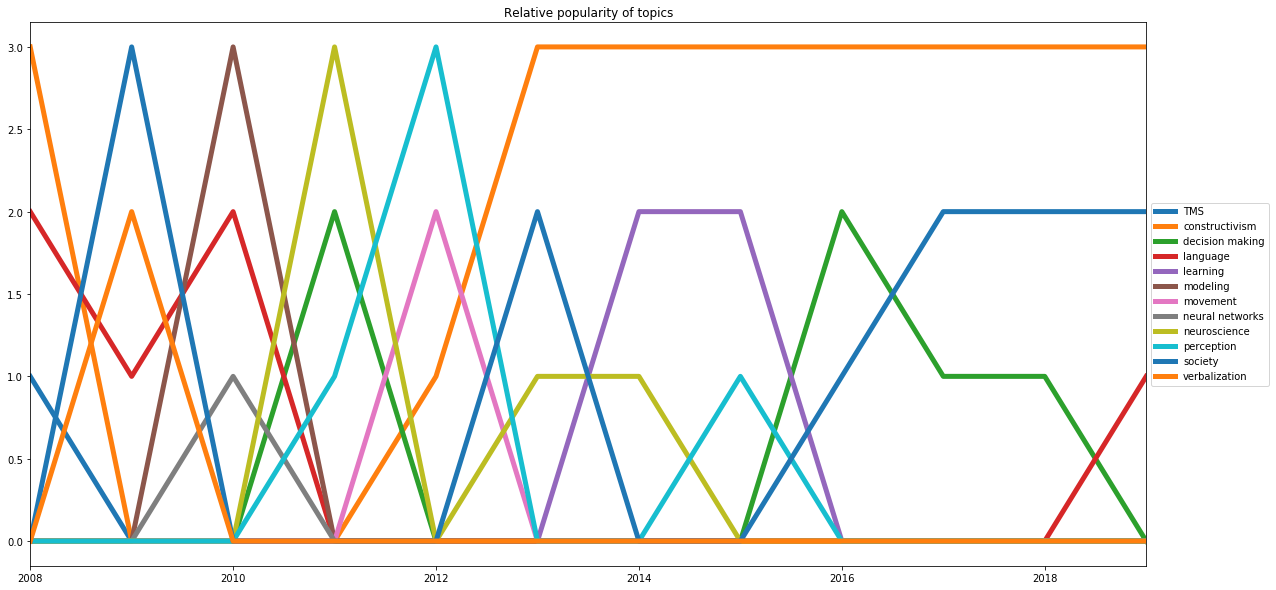

In [22]:
pandas.DataFrame(position_by_year).T.plot(figsize=(20,10), title='Relative popularity of topics', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

And here is the data. 

In [23]:
pandas.DataFrame(most_freq_3_by_year).T

,0,1,2
2008,constructivism,language,TMS
2009,society,verbalization,language
2010,modeling,language,neural networks
2011,neuroscience,decision making,perception
2012,perception,movement,constructivism
2013,constructivism,society,neuroscience
2014,constructivism,learning,neuroscience
2015,constructivism,learning,perception
2016,constructivism,decision making,society
2017,constructivism,society,decision making


In [24]:
pandas.DataFrame(most_freq_3_by_year)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,constructivism,society,modeling,neuroscience,perception,constructivism,constructivism,constructivism,constructivism,constructivism,constructivism,constructivism
1,language,verbalization,language,decision making,movement,society,learning,learning,decision making,society,society,society
2,TMS,language,neural networks,perception,constructivism,neuroscience,neuroscience,perception,society,decision making,decision making,language


Next I am going to see the relative importance of each topic. I am going to be looking from 2010 onward, since 2009 had only 2 articles and this can bias the analysis. 

In [25]:
relative_pandas = pandas.DataFrame(topics_by_year_all).rename(columns=all_topics_names).T
for column in relative_pandas:
    relative_pandas[column] = relative_pandas[column] / all_files_in_year[column]

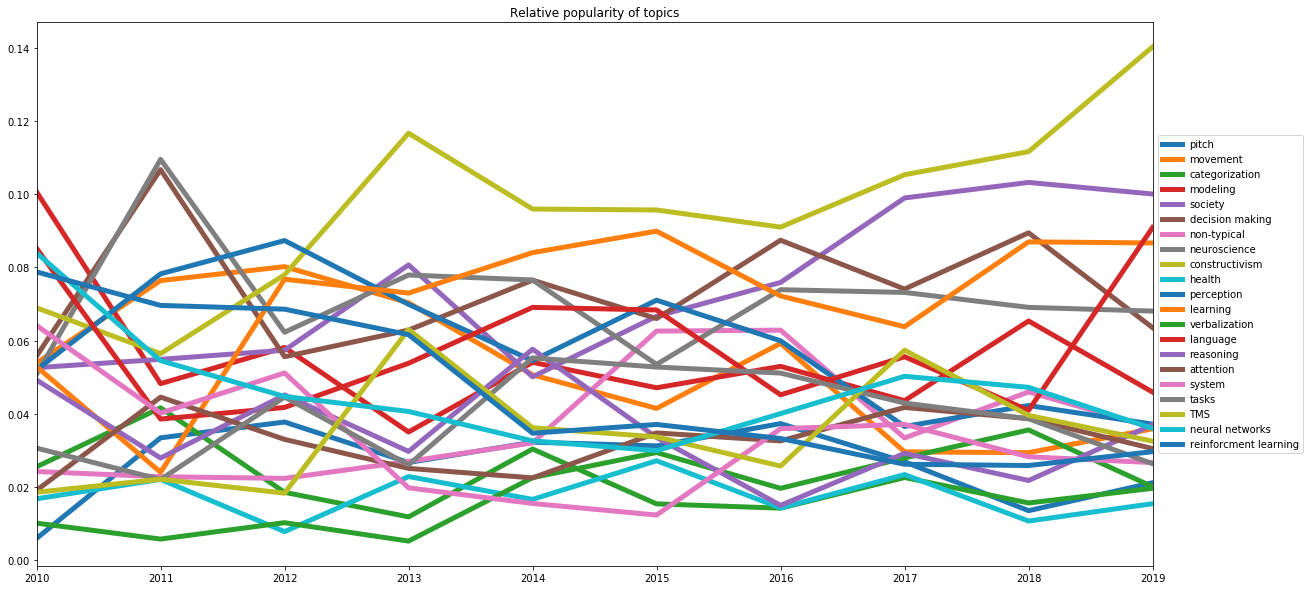

In [26]:
relative_pandas[[str(i) for i in range(2010, 2020)]].T.plot(figsize=(20,10), title='Relative popularity of topics', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

And only for the 8 most popular topics. 

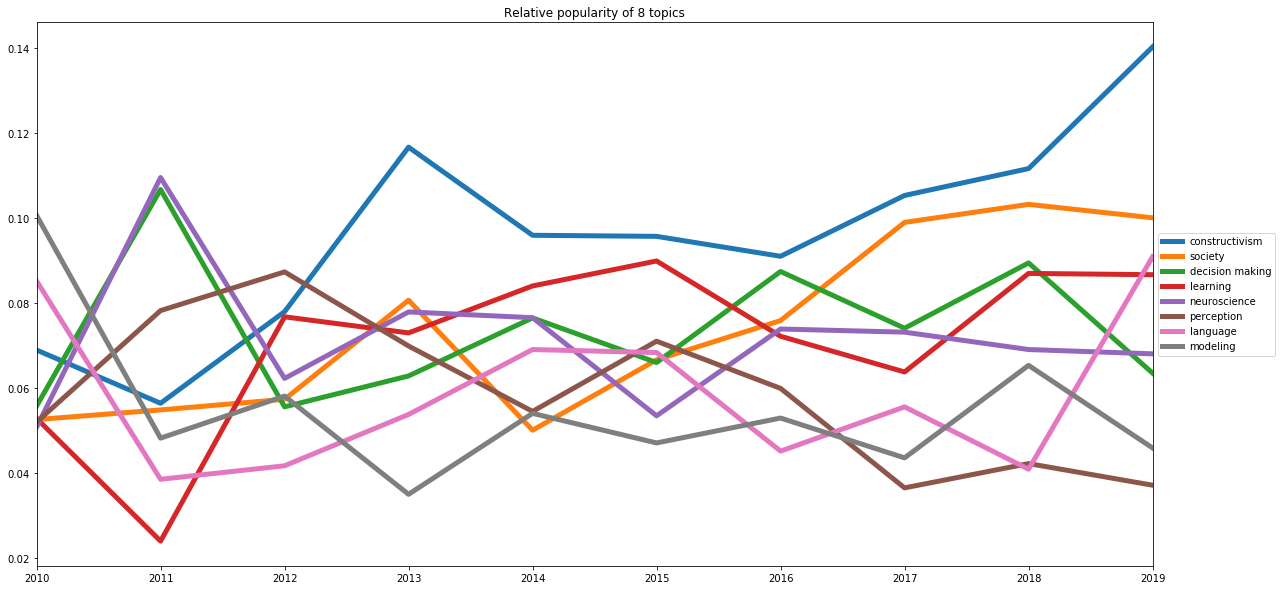

In [27]:
relative_pandas.T[2:][["constructivism", "society", "decision making", "learning", "neuroscience", "perception", "language", "modeling"]].plot(figsize=(20,10), title='Relative popularity of 8 topics', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Or the relative importance of just three most important topics. 

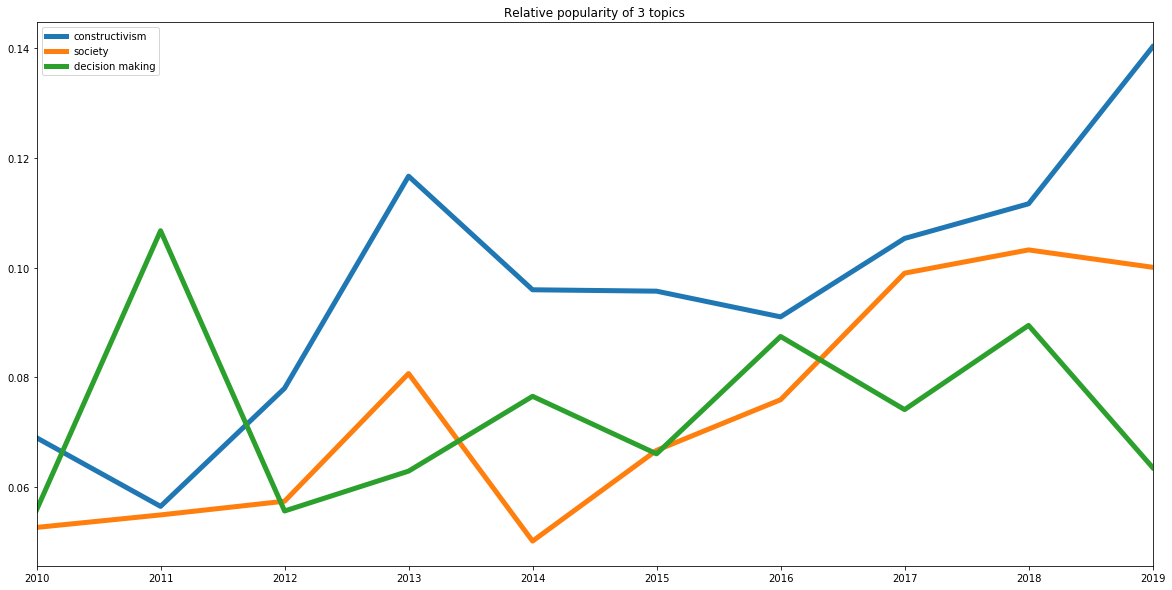

In [28]:
relative_pandas.T[2:][["constructivism", "society", "decision making"]].plot(figsize=(20,10), title='Relative popularity of 3 topics', linewidth=5)

Or the relative importance of 4 topics. 

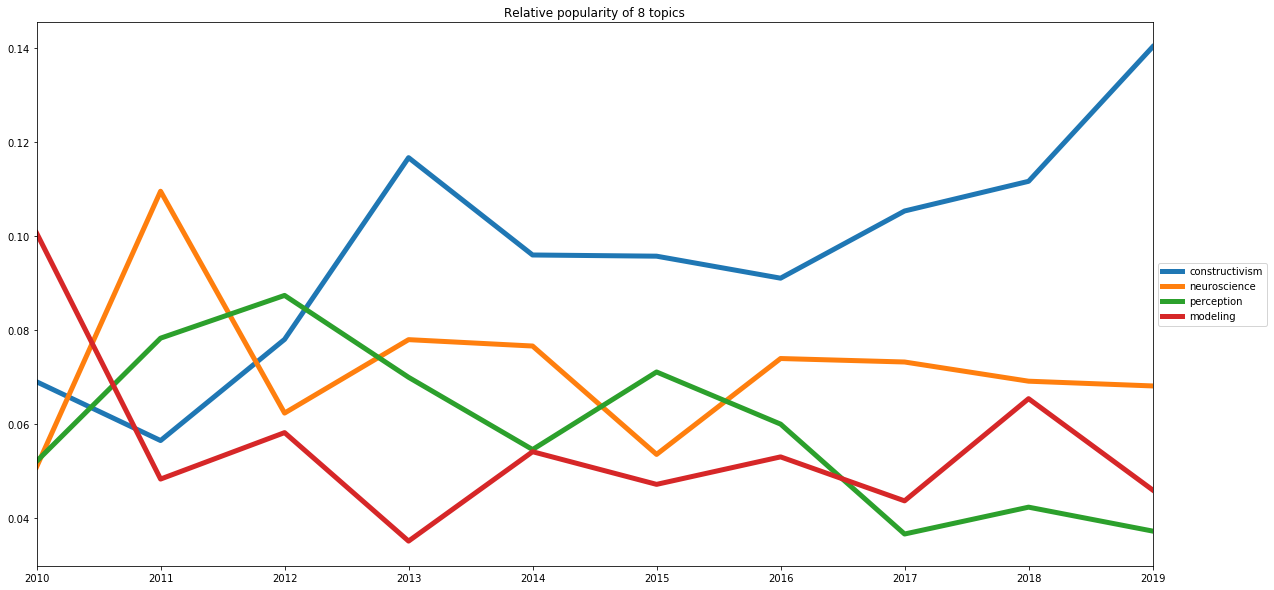

In [29]:
relative_pandas.T[2:][["constructivism", "neuroscience", "perception", "modeling"]].plot(figsize=(20,10), title='Relative popularity of 8 topics', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))